## Processamento de Linguagem Natural para Análise de Críticas de Filmes

Database em https://www.kaggle.com/luisfredgs/imdb-ptbr

In [83]:
import pandas as pd

In [84]:
review = pd.read_csv("imdb-reviews-pt-br.csv")
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [85]:
# trocando neg por 0 e pos por 1
change = review["sentiment"].replace(["neg", "pos"], [0, 1])
change.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [86]:
# adicionando coluna a review
review["sentimentBIN"] = change
review.head()

,id,text_en,text_pt,sentiment,sentimentBIN
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [87]:
# checando se dados estão balanceados para executar treinamento
print(review["sentimentBIN"].value_counts())

0    24765
1    24694
Name: sentimentBIN, dtype: int64


### BAG OF WORDS
Neste modelo, o texto (uma frase ou documento) é representado como um multiconjunto de suas palavras (o "saco"), desconsiderando a estrutura gramatical e até mesmo a ordenação delas, mas mantendo sua multiplicidade


In [88]:
# implementando bag of words (fazendo dicionário de palavras)
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
model = CountVectorizer(max_features=50)

bagOfWords = model.fit_transform(review["text_pt"])
model.get_feature_names()

['ao',
 'apenas',
 'as',
 'bem',
 'com',
 'como',
 'da',
 'de',
 'do',
 'dos',
 'ela',
 'ele',
 'eles',
 'em',
 'era',
 'esse',
 'este',
 'está',
 'eu',
 'filme',
 'filmes',
 'foi',
 'história',
 'isso',
 'mais',
 'mas',
 'me',
 'muito',
 'na',
 'no',
 'não',
 'os',
 'ou',
 'para',
 'por',
 'quando',
 'que',
 'realmente',
 'se',
 'ser',
 'seu',
 'sobre',
 'sua',
 'são',
 'também',
 'tem',
 'tão',
 'um',
 'uma',
 'você']

In [90]:
# transformando numa matriz para visualizar melhor
dictionary = pd.SparseDataFrame(bagOfWords, columns = model.get_feature_names())
dictionary

,ao,apenas,as,bem,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,1.0,NaN,NaN,1.0,2.0,1.0,NaN,4,4.0,2.0,...,2.0,1.0,NaN,NaN,NaN,1.0,NaN,3,2.0,NaN
1,NaN,NaN,NaN,2.0,2.0,NaN,NaN,7,1.0,3.0,...,1.0,NaN,NaN,2.0,NaN,1.0,NaN,5,2.0,1.0
2,NaN,NaN,NaN,NaN,3.0,1.0,NaN,10,2.0,NaN,...,NaN,NaN,NaN,3.0,1.0,NaN,1.0,3,2.0,2.0
3,NaN,1.0,4.0,1.0,7.0,2.0,1.0,13,3.0,1.0,...,NaN,NaN,NaN,2.0,NaN,1.0,NaN,7,4.0,1.0
4,NaN,1.0,2.0,1.0,3.0,NaN,1.0,16,2.0,1.0,...,NaN,NaN,1.0,4.0,NaN,NaN,NaN,3,4.0,NaN
5,1.0,NaN,NaN,NaN,1.0,1.0,NaN,3,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2,1.0,NaN
6,NaN,1.0,NaN,NaN,1.0,2.0,NaN,10,NaN,1.0,...,2.0,NaN,NaN,1.0,1.0,2.0,NaN,5,NaN,NaN
7,NaN,NaN,NaN,NaN,1.0,2.0,NaN,6,3.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3,2.0,4.0
8,NaN,1.0,NaN,NaN,1.0,1.0,NaN,10,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,2.0,2.0
9,NaN,NaN,1.0,NaN,3.0,2.0,3.0,15,1.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,4,3.0,NaN


In [91]:
# separando dados para treino e teste (75% treino, 25% teste)
from sklearn.model_selection import train_test_split

In [92]:
train, test, trainClass, testClass = train_test_split(bagOfWords, review["sentimentBIN"], random_state = 42)

In [93]:
print(train.shape)
print(test.shape)

(37094, 50)
(12365, 50)


In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
# treinando
logisticRegression = LogisticRegression()
logisticRegression.fit(train, trainClass)

# testando
prevision = logisticRegression.predict_proba(test)
print(prevision)

[[0.26596795 0.73403205]
 [0.67202684 0.32797316]
 [0.73219222 0.26780778]
 ...
 [0.52071767 0.47928233]
 [0.47636944 0.52363056]
 [0.52757599 0.47242401]]


In [96]:
# transformando em bool (neg - 0 e pos - 1)
previsionBool = prevision[:, 1] >= 0.5
print(previsionBool)

[ True False False ... False  True False]


In [97]:
import numpy as np

In [98]:
# transformando em 0 ou 1
previsionInt = previsionBool.astype(np.int)
print(previsionInt)

[1 0 0 ... 0 1 0]


In [99]:
from sklearn.metrics import accuracy_score

In [103]:
# comparando resultado obtido com o resultado original
accuracyTest = accuracy_score(testClass, previsionInt)
print("Taxa de acerto:", accuracyTest)

Taxa de acerto: 0.6688232915487262


### WORLD CLOUD

Biblioteca em https://github.com/amueller/word_cloud

In [109]:
!pip install wordcloud
!python -m pip install -U matplotlib

    100% |████████████████████████████████| 14.3MB 947kB/s ta 0:00:011
    100% |████████████████████████████████| 112kB 1.3MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 1.1MB/s ta 0:00:011


In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [135]:
# palavras positivas
posReview = review.query("sentiment=='pos'")
wordsPos = ' '.join([word for word in posReview["text_pt"]])

In [136]:
cloudPos = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsPos)

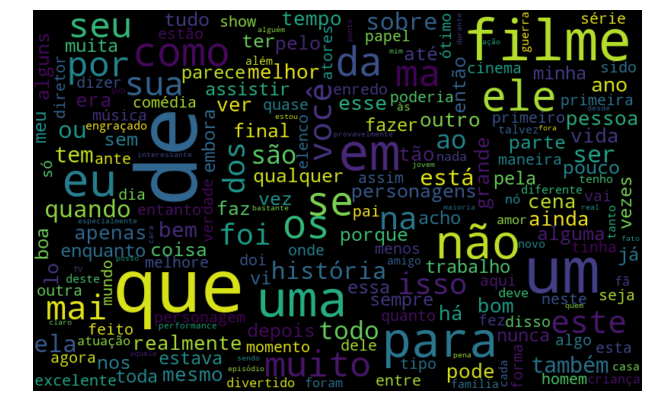

In [137]:
plt.figure(figsize=(30,7))
plt.imshow(cloudPos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [138]:
# palavras negativas
negReview = review.query("sentiment=='neg'")
wordsNeg = ' '.join([word for word in negReview["text_pt"]])

In [139]:
cloudNeg = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsNeg)

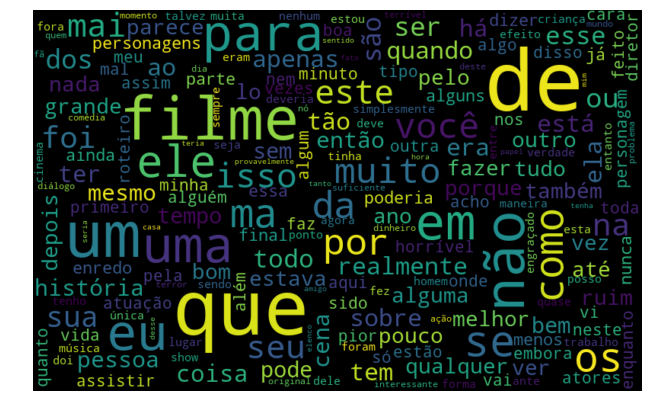

In [140]:
plt.figure(figsize=(30,7))
plt.imshow(cloudNeg, interpolation="bilinear")
plt.axis("off")
plt.show()